In [1]:
import pyspark as ps
spark = ps.sql.SparkSession.builder \
            .master("local[6]") \
            .appName("df case study") \
            .getOrCreate()

tweets_df = spark.read.json('../data/french_tweets.json').sample(False, 0.2, seed =25)

In [2]:
dicta={}

for i in range(10):
    s=str(tweets_df[i])
    s=s.strip('"Column<b')
    s=s.strip("'>'")
    dicta[i]=s
print(dicta)

{0: 'contributors', 1: 'coordinates', 2: 'created_at', 3: 'display_text_range', 4: 'entities', 5: 'extended_entities', 6: 'extended_tweet', 7: 'favorite_count', 8: 'favorited', 9: 'filter_level'}


In [4]:
#Here to
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgrey'
# docker start sparkbook
import pyspark as ps

spark = (ps.sql.SparkSession.builder 
        .master("local[6]") 
        .appName("case study") 
        .getOrCreate()
        )
sc = spark.sparkContext

In [5]:
df_json = spark.read.json('../data/french_tweets.json')

# create a temporary table for spark.sql queries
df_json.createOrReplaceTempView('temp1')

# possibly sensitive results for all quoted_status
q1 = spark.sql(
'''
SELECT created_at, possibly_sensitive
FROM temp1; 
'''
).collect()

In [21]:
q2 = spark.sql('''
SELECT lang , text,created_at, possibly_sensitive, quoted_status.favorite_count
FROM temp1
WHERE lang = 'en' and possibly_sensitive = "True";
''').collect()

# An Ananlysis of the most favorited tweets that were sensitive and in english reveal Porn, some suspended accounts, numerous mislabeled (i.e. wood, perhaps as a buzz word? 
# 

In [48]:
q2[59:69]

[Row(lang='en', text='#RDC stop usurpation @MinakuAubin @Evebazaiba @LUBAYAMwenCongo @AdamBombole @fatshi13 @DSESANGA #CENCO @mashanubian… https://t.co/qxghYKgApK', created_at='Thu Apr 27 08:01:10 +0000 2017', possibly_sensitive=True, favorite_count=None),
 Row(lang='en', text="I'm at Le Millenaire 2 in paris https://t.co/mXb9DAtPOq", created_at='Thu Apr 27 08:03:34 +0000 2017', possibly_sensitive=True, favorite_count=None),
 Row(lang='en', text='Give the youth a platform and they will talk - @JemilahMahmood \nAbout us, with us \n#youthcompact https://t.co/fHSdUyqkKD', created_at='Thu Apr 27 08:06:10 +0000 2017', possibly_sensitive=True, favorite_count=None),
 Row(lang='en', text='#RDC stop usurpation @fabricepuela @SaveTheCongo @NkoyJoseph @tresinsolent @BogangaLisanga @OlivierKamitatu… https://t.co/8a3dUr4t5H', created_at='Thu Apr 27 08:09:16 +0000 2017', possibly_sensitive=True, favorite_count=None),
 Row(lang='en', text='One night in ring #paris🇫🇷 @andrebenamou @ Ile-de-France, Fra

In [6]:
q3 = spark.sql('''
SELECT lang , text,created_at, possibly_sensitive, quoted_status.favorite_count, entities.media.type
FROM temp1
WHERE lang = 'en' and possibly_sensitive = "True";
''').collect()

# An Ananlysis of the most favorited tweets that were sensitive and in english reveal Porn, some suspended accounts, numerous mislabeled (i.e. wood, perhaps as a buzz word? 
# 

In [7]:
q4 = spark.sql('''
SELECT lang , text,created_at, possibly_sensitive, quoted_status.favorite_count, entities.media.type
FROM temp1
WHERE lang = 'en';
''').collect()

# 

In [47]:
#Since n tweets is small , manual curation is possible 
# total_likes = 0
# for item in q2:
#     item_= str(item[-1])
#     if item_ != 'None':
#         print(item[1],item[-1], item[2])
#         total_likes+=item[-1]

In [ ]:
***4/16/21 @ 17:36 Since changing the sql searching , and knowing more on what quoted status means / and that it is different from
    regular status ... tabling this for now 

NameError: name 'spark' is not defined

Searching .retweet because .favorite_count resulted in None Ho testing...

In [ ]:
# Results show there is media among senisitive tweeets = True and senisitive tweets == False ... Meaning we can do a hypothesis test
# fucking strings and values and parsing is being annoying 4/18
#4/19 Based on above ... 

In [22]:
s11 = [row[1] for row in san if row[2] == "['photo']"]
s22 = [row[1] for row in san if row[2] != "['photo']"]
s3 = [s11,s22]

def ho_testing(x):
    '''
    Inputs: x= list of lists   
    output: a p_value 
    '''
    
    return stats.ttest_ind(x[0],x[1],alternative= "greater",equal_var =False)

print(ho_testing(x=s3))

Ttest_indResult(statistic=nan, pvalue=nan)


In [23]:
len(s22)

1368

In [3]:
#This version includes 1368 tweets | Thus its not just the quoted status since its more than
q55 = spark.sql('''
SELECT possibly_sensitive, quoted_status.favorite_count, temp1.entities.media.type 
FROM temp1
WHERE possibly_sensitive=True ;
''').collect()

In [7]:
q6 = spark.sql('''
SELECT possibly_sensitive, quoted_status.favorite_count, temp1.entities.media.type
FROM temp1
WHERE possibly_sensitive= False;
''').collect()

In [8]:
dfm55 = pd.DataFrame(q55)
len(dfm55)

1368

In [17]:
dfm6 = pd.DataFrame(q6)
dfm6.head()

,0,1,2
0,False,16.0,None
1,False,NaN,None
2,False,NaN,None
3,False,NaN,None
4,False,51.0,None


In [15]:
ses_dict = {'FalseNone':0,'TrueNone':0,"False['photo']":0}
falsez = 0
truez = 0
photo = 0
check=''
for item in san:
    check = str(item[0]) + str(item[2])
    likes = str(item[1])
    
    if check == 'FalseNone':
        falsez +=1
        ses_dict['FalseNone']+=int(likes)
    if check == 'TrueNone':
        truez+=1
        ses_dict['TrueNone']+=int(likes)
        
    else:
        photo+=1
        ses_dict["False['photo']"]+=int(likes)
    
print(ses_dict,falsez, truez,photo)
        
# 4/16/21 modify this to simply separate

{'FalseNone': 0, 'TrueNone': 0, "False['photo']": 0} 0 1048 320


In [12]:
q7 = spark.sql('''
SELECT possibly_sensitive, quoted_status.favorite_count, temp1.entities.media.type
FROM temp1
WHERE quoted_status.possibly_sensitive=True ;
''').collect()

In [23]:
df7=pd.DataFrame(q7)
ses_dictz = {'FalseNone':0,'TrueNone':0,"False['photo']":0}
falsezz = 0
truezz = 0
photoz = 0
checkz=''
for item in q7:
    checkz = str(item[0]) + str(item[2])
    likesz = str(item[1])
    if checkz == 'FalseNone':
        falsezz +=1
        ses_dictz['FalseNone']+=int(likesz)
    if checkz == 'TrueNone':
        truezz+=1
        ses_dictz['TrueNone']+=int(likesz)
    else:
        photoz+=1
        ses_dictz["False['photo']"]+=int(likesz)
    
print(ses_dictz,falsezz, truezz,photoz)

{'FalseNone': 1246016, 'TrueNone': 24790, "False['photo']": 1246016} 492 20 492


In [9]:
from pyspark.sql.functions import (dayofmonth,hour,format_number,date_format,month)

In [6]:
#doing content_filter for q4 
#clean strings

def content_filter2(q):
    content_df2={}
    counter = 0 
    for item in q:
        
        #time = item[2][11:18]
        hour_of_day=item[2][10:13] #Hour of day
        flagg = str(item[3]) #Senesitive Status 
        n_likes=str(item[4]) #int or none 
        photo_check = str(item[5]) #none or no
        
        if n_likes != 'None':
            n_likes = int( ''.join(n_likes.strip(':') )) 
            
        if photo_check == 'None':
            photo_check = 'No'

        vals = [hour_of_day,flagg,n_likes,photo_check]
        content_df2[counter] = vals    
        counter +=1
        
    return content_df2   

all_media = content_filter2(q4)

In [7]:
df =pd.DataFrame(all_media)
df_ = df.transpose()
df_.rename(columns = {0:'Hour', 1:'Sensitive', 2:'Like Count', 3:'Media'}, inplace=True)

In [31]:
df_.head()
df_['Type'] =  df_['Sensitive'] + df_['Media'] 
subset = df_[(df_['Like Count'] != 'None')]

In [43]:
df_.head()

,Hour,Sensitive,Like Count,Media,Type
0,13,None,None,No,NoneNo
1,13,False,None,['photo'],False['photo']
2,13,False,None,No,FalseNo
3,13,None,None,No,NoneNo
4,13,None,None,No,NoneNo


In [40]:
tup_lst = list(zip(subset['Type'].values, subset['Like Count'].values))

In [41]:
tup_lst[0]

('FalseNo', 1)

In [42]:
media_d = {}
for item in tup_lst:
    stats = item[0]
    likes = item[1]
    if stats not in media_d:
        media_d[stats] = likes
    else:
        media_d[stats]+= likes
print(media_d)
    

{'FalseNo': 4271736, 'TrueNo': 26409, "False['photo']": 19246}


In [27]:
subset.head()

,Hour,Sensitive,Like Count,Media,Type
7,13,False,1,No,FalseNo
36,13,False,6478,No,FalseNo
52,13,False,871,No,FalseNo
54,13,False,1,No,FalseNo
63,13,True,23,No,TrueNo


In [44]:
subset2 = subset[subset['Media']!= 'No']

In [7]:
def content_filter(q):
    content_df={}
    for item in q:

        time = item[2] 
        time2 = item[2][10:16]
        status = str(item[3])
        n_likes=str(item[4])
        photo_check = str(item[5])
        
        if n_likes != 'None':
            n_likes = int( ''.join(n_likes.strip(':') )) 
        if status != 'True' and status != 'False':
            status = int(status)
            
        vals = [time,status,n_likes,photo_check]
        
        content_df[time2] = vals    
        
    return content_df      

In [8]:
q3 = spark.sql('''
SELECT lang , text,created_at, possibly_sensitive, quoted_status.favorite_count, entities.media.type
FROM temp1
WHERE lang = 'en' and possibly_sensitive = "True";
''').collect()
#collecting data for ho testing on media type and flagged yes 
dfcon= content_filter(q3[0:78600 & 79500:]) 

media_type_counts = {'photo_likes':0}
photo_likes = 'photo_likes'
acum=0
for k,v in dfcon.items():
    media_type = v[3]
    likes = str(v[2])
    
    if likes == 'None':
        likes = 0
    acum+=int(likes)
    if media_type not in media_type_counts:
        
        media_type_counts[media_type]=1
        media_type_counts['photo_likes'] += int(likes)
        
    else:
        media_type_counts[media_type]+=1
    
        
        
print(media_type_counts,likes)
    
    
    
#go Through and collect / count occurances 
#of the 205 Flagged posts with media, 48 had a photo attachment and 133 did not
#For the 50 likes from the 205 flagged posts with media 23 had likes. 

{'photo_likes': 23, 'None': 133, "['photo']": 48} 50


In [9]:
# possibly sensitive results for all quoted_status
q1 = spark.sql(
'''
SELECT created_at, possibly_sensitive
FROM temp1; 
'''
).collect()

#tally tweets by hour. 

def times_hour(q):
    by_hour2={}
    for item in q:
        time = item[0][10:13]
        status = str(item[1])
        
        #text = item[2]
        if time not in by_hour2:
            by_hour2[time]={'yes':0, 'no':0, 'nao':0}
        if len(status) < 0:
            status = 'nao'
        if time in by_hour2.keys():
            if status == 'True':
                by_hour2[time]['yes'] +=1
            if status == 'False':
                by_hour2[time]['no']+=1
            else:
                by_hour2[time]['nao']+=1
    return by_hour2        

In [15]:
#dfcon.items()

In [11]:

by_hour = times_hour(q1[0:78600 & 79500:])
print(type(by_hour))

<class 'dict'>


In [27]:
by_hour 

{' 13': {'yes': 28, 'no': 2316, 'nao': 2600},
 ' 14': {'yes': 38, 'no': 2842, 'nao': 3856},
 ' 15': {'yes': 64, 'no': 4173, 'nao': 6094},
 ' 16': {'yes': 31, 'no': 1623, 'nao': 2105},
 ' 17': {'yes': 40, 'no': 1913, 'nao': 3228},
 ' 18': {'yes': 10, 'no': 878, 'nao': 1578},
 ' 19': {'yes': 10, 'no': 697, 'nao': 1771},
 ' 20': {'yes': 5, 'no': 444, 'nao': 1229},
 ' 21': {'yes': 18, 'no': 1383, 'nao': 2394},
 ' 22': {'yes': 30, 'no': 1209, 'nao': 2205},
 ' 23': {'yes': 33, 'no': 965, 'nao': 1220},
 ' 00': {'yes': 0, 'no': 3, 'nao': 15},
 ' 01': {'yes': 5, 'no': 225, 'nao': 488},
 ' 02': {'yes': 4, 'no': 174, 'nao': 208},
 ' 03': {'yes': 5, 'no': 68, 'nao': 59},
 ' 04': {'yes': 9, 'no': 463, 'nao': 575},
 ' 05': {'yes': 1, 'no': 30, 'nao': 34},
 ' 06': {'yes': 14, 'no': 1454, 'nao': 1471},
 ' 07': {'yes': 23, 'no': 1988, 'nao': 1980},
 ' 08': {'yes': 28, 'no': 2254, 'nao': 2117},
 ' 09': {'yes': 21, 'no': 2113, 'nao': 2454},
 ' 10': {'yes': 27, 'no': 2241, 'nao': 2423},
 ' 11': {'yes': 40

In [11]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgrey'

In [23]:
# df_play = pd.DataFrame(time_counts ) 
# df_play2=df_play.transpose()
# print(df_play2)
# time_stamp = df_play2.index.values
# df_play2['time_stamp'] = time_stamp

In [46]:
#sort dict, graph x = key, y = yes_num
lst=[]
for k,v in by_hour.items():
    k_=int(k)
    c=list(v.values())
    lst.append((k_,c[1]))
lst.sort(key = lambda x: x[0])
print(lst)

[(0, 3), (1, 225), (2, 174), (3, 68), (4, 463), (5, 30), (6, 1454), (7, 1988), (8, 2254), (9, 2113), (10, 2241), (11, 2131), (12, 1954), (13, 2316), (14, 2842), (15, 4173), (16, 1623), (17, 1913), (18, 878), (19, 697), (20, 444), (21, 1383), (22, 1209), (23, 965)]


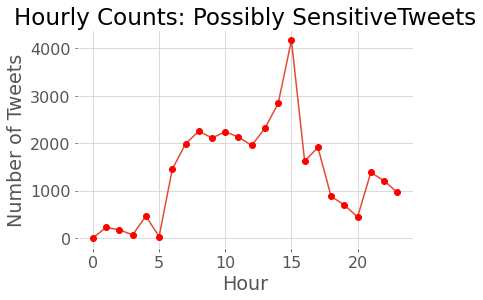

<Figure size 936x936 with 0 Axes>

In [47]:
# Number of flaggest tweets per hour en 

x_val = [i[0] for i in lst]
y_val = [i[1] for i in lst]
plt.title('Hourly Counts: Possibly SensitiveTweets')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.plot(x_val,y_val)
plt.plot(x_val,y_val, 'or')
plt.figure(figsize=(13,13))
plt.show()

[(0, 3), (1, 225), (2, 174), (3, 68), (4, 463), (5, 30), (6, 1454), (7, 1988), (8, 2254), (9, 2113), (10, 2241), (11, 2131), (12, 1954), (13, 2316), (14, 2842), (15, 4173), (16, 1623), (17, 1913), (18, 878), (19, 697), (20, 444), (21, 1383), (22, 1209), (23, 965)]
[(0, 3), (0, 15), (1, 225), (1, 488), (2, 174), (2, 208), (3, 68), (3, 59), (4, 463), (4, 575), (5, 30), (5, 34), (6, 1454), (6, 1471), (7, 1988), (7, 1980), (8, 2254), (8, 2117), (9, 2113), (9, 2454), (10, 2241), (10, 2423), (11, 2131), (11, 2326), (12, 1954), (12, 2373), (13, 2316), (13, 2600), (14, 2842), (14, 3856), (15, 4173), (15, 6094), (16, 1623), (16, 2105), (17, 1913), (17, 3228), (18, 878), (18, 1578), (19, 697), (19, 1771), (20, 444), (20, 1229), (21, 1383), (21, 2394), (22, 1209), (22, 2205), (23, 965), (23, 1220)]


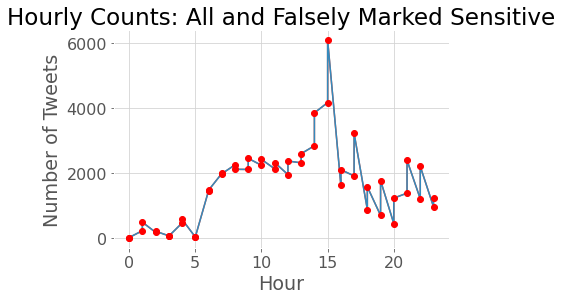

<Figure size 936x936 with 0 Axes>

In [45]:
#as Compared to False_senisitive tweets per hour and all tweets per hour
lst_all=[]
for k,v in by_hour.items():
    k_=int(k)
    c=list(v.values())
    lst_all.append((k_,c[1]))
lst_all.sort(key = lambda x: x[0])
print(lst_all)

lst_f=[]
for k,v in by_hour.items():
    k_=int(k)
    c=list(v.values())
    lst_all.append((k_,c[2]))
lst_all.sort(key = lambda x: x[0])
print(lst_all)

x_val = [i[0] for i in lst_all]
y_val_all = [i[1] for i in lst_all]

plt.title('Hourly Counts: All and Falsely Marked Sensitive')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.plot(x_val,y_val_all)
plt.plot(x_val,y_val_all)
plt.plot(x_val,y_val_all,  'or')
plt.figure(figsize=(13,13))
plt.show()

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline
fig1 = plt.line()

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

In [ ]:
# HERE 

In [ ]:
s= "[Row(contributors=None, coordinates=None, created_at='Wed Apr 26 13:30:46 +0000 2017', display_text_range=[25, 82], entities=Row(hashtags=[], media=None, symbols=[], urls=[], user_mentions=[Row(id=326757541, id_str='326757541', indices=[0, 9], name=L'Echo Républicain, screen_name='lecho_fr'), Row(id=3482554756, id_str='3482554756', indices=[10, 24], name='La Saucelle Off', screen_name='lasaucelleoff')]), extended_entities=None, extended_tweet=None, favorite_count=0, favorited=False, filter_level='low', geo=None, id=857225441157021697, id_str='857225441157021697', in_reply_to_screen_name='lecho_fr', in_reply_to_status_id=817116111389032448, in_reply_to_status_id_str='817116111389032448', in_reply_to_user_id=326757541, in_reply_to_user_id_str='326757541', is_quote_status=False, lang='fr', limit=None, place=Row(bounding_box=Row(coordinates=[[[1.427255, 48.421392], [1.427255, 48.446024], [1.478306, 48.446024], [1.478306, 48.421392]]], type='Polygon'), country='France', country_code='FR', full_name='Lucé, France', id='50d429c8224054f9', name='Lucé', place_type='city', url='https://api.twitter.com/1.1/geo/id/50d429c8224054f9.json'), possibly_sensitive=None, quoted_status=None, quoted_status_id=None, quoted_status_id_str=None, retweet_count=0, retweeted=False, source='<a href=http://twitter.com/download/android rel=nofollow>Twitter for Android</a>', text=@lecho_fr @lasaucelleoff J'espère faire mieux mais c'est pas sûr dieu seul le sait, timestamp_ms='1493213446307', truncated=False, user=Row(contributors_enabled=False, created_at='Mon Dec 05 16:07:15 +0000 2016', default_profile=False, default_profile_image=False, description='Je reste discret sur ma vie comme ça pas de mensonge â vous dire. La photo vous dit la réponse pas compliqué à comprendre?', favourites_count=13, follow_request_sent=None, followers_count=5, following=None, friends_count=20, geo_enabled=True, id=805805743316357120, id_str='805805743316357120', is_translator=False, lang='fr', listed_count=2, location='Centre, France', name='Bjr du Centre', notifications=None, profile_background_color='000000', profile_background_image_url='http://abs.twimg.com/images/themes/theme1/bg.png', profile_background_image_url_https='https://abs.twimg.com/images/themes/theme1/bg.png', profile_background_tile=False, profile_banner_url='https://pbs.twimg.com/profile_banners/805805743316357120/1493199314', profile_image_url='http://pbs.twimg.com/profile_images/856537187592155136/zuiUKOym_normal.jpg', profile_image_url_https='https://pbs.twimg.com/profile_images/856537187592155136/zuiUKOym_normal.jpg', profile_link_color='E81C4F', profile_sidebar_border_color='000000', profile_sidebar_fill_color='000000', profile_text_color='000000', profile_use_background_image=False, protected=False, screen_name='scorpionrouge21', statuses_count=8, time_zone='Paris', url=None, utc_offset=7200, verified=False))]"

In [4]:

tweets_df[1]['retweet_count']

Column<b'coordinates[retweet_count]'>

In [5]:
tweets_df.take(1)

[Row(contributors=None, coordinates=None, created_at='Wed Apr 26 13:30:46 +0000 2017', display_text_range=[25, 82], entities=Row(hashtags=[], media=None, symbols=[], urls=[], user_mentions=[Row(id=326757541, id_str='326757541', indices=[0, 9], name="L'Echo Républicain", screen_name='lecho_fr'), Row(id=3482554756, id_str='3482554756', indices=[10, 24], name='La Saucelle Off', screen_name='lasaucelleoff')]), extended_entities=None, extended_tweet=None, favorite_count=0, favorited=False, filter_level='low', geo=None, id=857225441157021697, id_str='857225441157021697', in_reply_to_screen_name='lecho_fr', in_reply_to_status_id=817116111389032448, in_reply_to_status_id_str='817116111389032448', in_reply_to_user_id=326757541, in_reply_to_user_id_str='326757541', is_quote_status=False, lang='fr', limit=None, place=Row(bounding_box=Row(coordinates=[[[1.427255, 48.421392], [1.427255, 48.446024], [1.478306, 48.446024], [1.478306, 48.421392]]], type='Polygon'), country='France', country_code='FR',

In [7]:
tweets_df.take(2)

[Row(contributors=None, coordinates=None, created_at='Wed Apr 26 13:30:46 +0000 2017', display_text_range=[25, 82], entities=Row(hashtags=[], media=None, symbols=[], urls=[], user_mentions=[Row(id=326757541, id_str='326757541', indices=[0, 9], name="L'Echo Républicain", screen_name='lecho_fr'), Row(id=3482554756, id_str='3482554756', indices=[10, 24], name='La Saucelle Off', screen_name='lasaucelleoff')]), extended_entities=None, extended_tweet=None, favorite_count=0, favorited=False, filter_level='low', geo=None, id=857225441157021697, id_str='857225441157021697', in_reply_to_screen_name='lecho_fr', in_reply_to_status_id=817116111389032448, in_reply_to_status_id_str='817116111389032448', in_reply_to_user_id=326757541, in_reply_to_user_id_str='326757541', is_quote_status=False, lang='fr', limit=None, place=Row(bounding_box=Row(coordinates=[[[1.427255, 48.421392], [1.427255, 48.446024], [1.478306, 48.446024], [1.478306, 48.421392]]], type='Polygon'), country='France', country_code='FR',

In [14]:
tweets_df.printSchema()

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- display_url: string (nullable = true)
 |    |    |    |-- expanded_url: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- id_str: string (nullable = true)
 |    |    |    |

In [3]:
import pandas as pd
import numpy as np


In [4]:
sam = tweets_df.sample(.50)

In [5]:
sample_count = sam.count()

In [6]:
print(sample_count)

21560


In [7]:
sam.createOrReplaceTempView("tweet_sample1")

In [8]:
result1 = spark.sql('''
                SELECT id, text, created_at,tweet_sample1.quoted_status.user.favourites_count
                FROM tweet_sample1
                ORDER BY tweet_sample1.quoted_status.user.favourites_count DESC
''')

result1.show(3)

+------------------+--------------------+--------------------+----------------+
|                id|                text|          created_at|favourites_count|
+------------------+--------------------+--------------------+----------------+
|857529039728381952|Les #Jobs de dema...|Thu Apr 27 09:37:...|          420115|
|857563753105289217|Just for once i a...|Thu Apr 27 11:55:...|          354878|
|857992085563158533|Salut c est genti...|Fri Apr 28 16:17:...|          279186|
+------------------+--------------------+--------------------+----------------+
only showing top 3 rows



In [14]:
for i in range(len(dicta)):
    
    s=dicta[i] 
    print(dicta[i])
    print(s)
    
    result[i] = spark.sql('''
                SELECT *
                FROM tweet_sample1
                ''')
    
    print(result[i].show( ))



contributors
contributors


AnalysisException: Table or view not found: tweet_sample1; line 3 pos 21;
'Project [*]
+- 'UnresolvedRelation [tweet_sample1]


In [10]:
tweets_df[i]

Column<b'contributors'>

In [11]:
resultq = spark.sql('''
                SELECT id, text, user.screen_name, user.favourites_count
                FROM tweet_sample1
                
              
''')

resultq.show() 

+------------------+--------------------+---------------+----------------+
|                id|                text|    screen_name|favourites_count|
+------------------+--------------------+---------------+----------------+
|857225456529092611|@1001portails Mai...|      icp3_zero|           44558|
|857225468659068929|Il  bégaye comme ...|     Raf_Heddid|            6656|
|857225502062505984|I wonder what the...|   harry_chitty|            3949|
|857225534178299905|@Maroussiia_ Ahah...|     vltdalbane|           12338|
|857225589903810560|j'aurais jms dû a...|         Woroox|            4741|
|857225634975809536|Sans déconner, ma...|lucaas_vieira21|            1156|
|857225665153826820|@fredericmorea11 ...|      2cevennes|           16457|
|857225726839459841|@SportEte 
Sport'...|       SportEte|              92|
|857225749043888128|⚜️ @ Heaven https...|    nonykarlina|              18|
|857225837313228800|será q eu to doen...|     bbrutinha_|            4674|
|857225872708915201|Landk

In [133]:


result2 = spark.sql('''
                SELECT id, text, tweet_sample1.user.retweet_count
                FROM tweet_sample1
                ORDER BY tweet_sample1.retweet_count DESC
''')

result2.show()

+------------------+--------------------+-------------+
|                id|                text|retweet_count|
+------------------+--------------------+-------------+
|857626515546271744|les nouveautés gr...|            0|
|857626537096556545|@Djamst40Sisi @Na...|            0|
|857626550614863872|@Lacoussiere De l...|            0|
|857626569036021760|Présentation du C...|            0|
|857626619317547008|jsp https://t.co/...|            0|
|857626823081046018|Mon père https://...|            0|
|857626832253923328|https://t.co/baal...|            0|
|857626835953307651|@emzregina Merci ...|            0|
|857626858283773953|Recu ! Monté ! Te...|            0|
|857626860238372864|Pour toutes infor...|            0|
|857626871319732225|yes 😏 https://t....|            0|
|857626887857766402|.@carolineroux @C...|            0|
|857626970556964864|⭐ Casting sous le...|            0|
|857626990400208896|Türkiye'ye dair ö...|            0|
|857626997270491137|😂 https://t.co/t...|         

In [135]:
some_var = result2.toPandas()

In [138]:
some_var['retweet_count'].max()

0

In [118]:
result3 = spark.sql('''
                SELECT id, text, created_at, tweet_sample1.quoted_status.user.followers_count
                FROM tweet_sample1
                ORDER BY tweet_sample1.quoted_status.user.followers_count DESC
''')

result3.show()

+------------------+--------------------+--------------------+---------------+
|                id|                text|          created_at|followers_count|
+------------------+--------------------+--------------------+---------------+
|857836007609311232|Moi aussi je veux...|Fri Apr 28 05:56:...|       52334711|
|857650207969955840|awwwn, beyond pro...|Thu Apr 27 17:38:...|       51196690|
|857261750105845760|$400,000 to speak...|Wed Apr 26 15:55:...|       35588396|
|857930276592381954|Bordel de merde h...|Fri Apr 28 12:11:...|       29988889|
|857930099689222145|MON DÉCÈS EST OFF...|Fri Apr 28 12:10:...|       29988884|
|858110739726446592|Non mais putain o...|Sat Apr 29 00:08:...|       28446210|
|857621071125766144|we spend more on ...|Thu Apr 27 15:42:...|       28396890|
|857553736205553666|Trump tries to sh...|Thu Apr 27 11:15:...|       28384051|
|857244896104775680|Elle a réveillé e...|Wed Apr 26 14:48:...|       22180074|
|858090075435020289|La louche de Ronn...|Fri Apr 28 

In [126]:
result3.count()

21654

In [89]:
df3 = result3.toPandas() 

In [119]:
df5=result3.toPandas()

In [120]:
df5.dropna(inplace=True)

In [121]:
df5.head(2)

,id,text,created_at,followers_count
0,857836007609311232,Moi aussi je veux jouer dans une piscine avec ...,Fri Apr 28 05:56:56 +0000 2017,52334711.0
1,857650207969955840,"awwwn, beyond proud of you Keeks ❤️❤️ https://...",Thu Apr 27 17:38:38 +0000 2017,51196690.0


In [123]:
macron_tweets = df5[df5['text'].str.contains('Macron')]
print(macron_tweets['followers_count'].sum())


le_pen_tweets = df5[df5['text'].str.contains('Le Pen')]
#print(le_pen_tweets)
print(le_pen_tweets['followers_count'].sum())



17318016.0
2550388.0


In [124]:
print(17318016+2550388)

19868404


In [96]:
print(macron_tweets)

                       id                                               text  \
1      858028863116500993  @LePenNON Lui non plus n'a pas envie d'aller v...   
157    857996336830066690  @Gerard_Larcher est clair le vote républicain ...   
200    857942378698690561  #DangerMacron venant de la part du FM, ça me f...   
241    857504967296417792  @EmmanuelMacron @TeamMacron2017 @BFMPolitique ...   
264    857960035602903040  Ca ressemble beaucoup à la famille Addams #AuN...   
...                   ...                                                ...   
21566  858164535248777216  #Macron a fait une erreur en se rendant à #ora...   
21587  858170998444761088  @Benedicte1512 @EmmanuelMacron Là, on a le pom...   
21621  858179239958515712  @KikiReynaud @slashorz @mwesfreid @Deemee3 @Em...   
21626  858180364585533440  @hemicycliste @DanielPilotte @actufr_officiel ...   
21635  858181787746545664   @EmmanuelMacron Tu lui arrive pas à la cheville.   

                           created_at  

In [97]:
print(le_pen_tweets)

                       id                                               text  \
375    857246568151474176       Macron 1 - Le Pen 0. https://t.co/6mHTPOo3jy   
400    857686491031638016  Le Pen following the Trump playbook https://t....   
778    857530670096240640  A trop dénigrer Macron on va se payer Le Pen.....   
1043   857242850865684480  Ça pique même plus encore. En ne disant pas Le...   
1127   857709735210037250  Ça c'est pour avoir voté Le Pen https://t.co/Z...   
...                   ...                                                ...   
19368  858041216755265536  #BFMTV\n\nLe Pen n' a fait qu' haranguer (sans...   
19801  858052141788934146  Le pacte de Dupont-Aignan avec Le Pen: les des...   
20345  858065254978383872     "l'Europe s'est radicalisée"\n_ Marine Le Pen.   
20538  858070764490289153  Eh je vous jure retirez le droit de vote à ma ...   
21431  858110852360278016  Non la France n'est pas fasciste non la France...   

                           created_at  

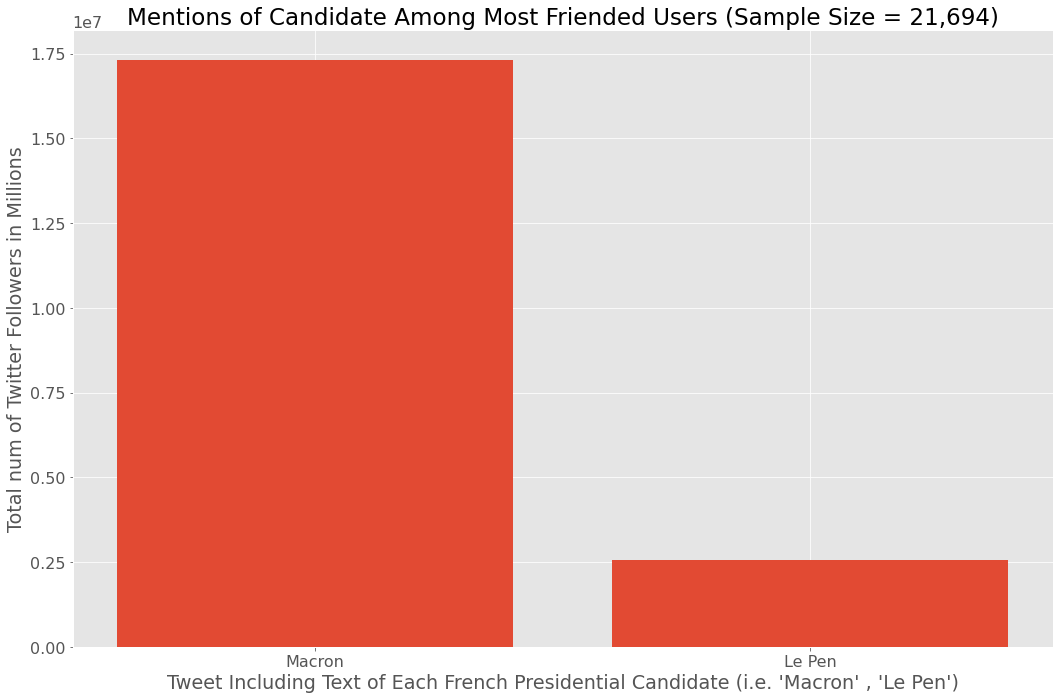

In [127]:
#print(+
# Plotting Code for Bar Charts

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'font.family': 'sans'})

fav_counts = pd.DataFrame({'candidate' : ['Macron', 'Le Pen'],
                           'Friend_count' : [17318016,2550388]})

x = np.arange(len(fav_counts['candidate']))

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(x,fav_counts['Friend_count'])
ax.set_xticks(x)
ax.set_xticklabels(fav_counts['candidate'])
ax.set_title("Mentions of Candidate Among Most Friended Users (Sample Size = 21,694)")
ax.set_xlabel("Tweet Including Text of Each French Presidential Candidate (i.e. 'Macron' , 'Le Pen')")
ax.set_ylabel("Total num of Twitter Followers in Millions")
plt.tight_layout()
plt.show()

In [116]:
plt.savefig('friends.png', dpi=300, bbox_inches ='tight')

<Figure size 432x288 with 0 Axes>

In [117]:
plt.savefig('try2.png', dpi=300)

<Figure size 432x288 with 0 Axes>